In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler


In [4]:
csv_path = "climate_data.csv"
data_frame = pd.read_csv(csv_path)

In [5]:
data_frame= data_frame[(data_frame['DISTRICT']== 'Kathmandu')|(data_frame['DISTRICT']== 'Lalitpur')|(data_frame['DISTRICT']== 'Bhaktapur')]

In [6]:
DATE= data_frame['DATE']
District = data_frame['DISTRICT']
Lattitude = data_frame['LAT']
Longitude = data_frame['LON']
Prectot = data_frame['PRECTOT']
ps = data_frame['PS']
QV2M = data_frame['QV2M']
RH2M = data_frame['RH2M']
T2M= data_frame['T2M']
T2MWET= data_frame['T2MWET']
T2M_MAX= data_frame['T2M_MAX']
T2M_MIN = data_frame['T2M_MIN']
T2M_RANGE= data_frame['T2M_RANGE']
TS = data_frame['TS']
WS10M= data_frame['WS10M']
WS10M_MAX= data_frame['WS10M_MAX']
WS10M_MIN = data_frame['WS10M_MIN']
WS10M_RANGE = data_frame['WS10M_RANGE']
WS50M = data_frame['WS50M']
WS50M_MAX= data_frame['WS50M_MAX']
WS50M_MIN= data_frame['WS50M_MIN']
WS50M_RANGE= data_frame['WS50M_RANGE']

In [7]:
df = pd.concat([DATE,Lattitude,Longitude,Prectot,ps,
QV2M,
RH2M,
T2M,
T2MWET,
T2M_MAX,
T2M_MIN,
T2M_RANGE,
TS,
WS10M,
WS10M_MAX,
WS10M_MIN,
WS10M_RANGE,
WS50M,
WS50M_MAX,
WS50M_MIN,
WS50M_RANGE],axis=1)


In [8]:
df

,DATE,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
99708,1/1/1981,27.7,85.5,0.00,77.95,3.56,49.73,5.37,-5.16,12.24,...,11.60,2.34,1.70,3.97,0.51,3.45,1.65,3.17,0.59,2.59
99709,1/2/1981,27.7,85.5,0.00,78.01,3.83,53.23,5.44,-4.21,11.50,...,9.34,2.18,1.58,4.19,0.12,4.07,1.44,3.31,0.14,3.17
99710,1/3/1981,27.7,85.5,0.00,77.96,4.25,61.59,4.82,-2.67,10.50,...,8.72,2.38,1.69,4.11,0.37,3.75,1.66,3.43,0.50,2.93
99711,1/4/1981,27.7,85.5,0.04,77.85,4.28,68.04,3.49,-2.61,9.02,...,8.83,1.94,1.78,4.19,0.28,3.92,1.78,3.49,0.35,3.14
99712,1/5/1981,27.7,85.5,0.22,77.85,4.10,66.77,3.15,-3.13,8.37,...,8.32,1.50,1.75,4.29,0.56,3.73,1.79,3.80,0.72,3.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441559,12/27/2019,27.6,85.3,0.00,84.01,3.32,54.14,4.21,-5.34,11.10,...,10.81,1.61,1.85,3.69,1.07,2.62,2.00,3.50,1.05,2.45
441560,12/28/2019,27.6,85.3,0.00,84.27,3.14,50.06,4.57,-5.45,12.44,...,14.46,2.01,2.16,3.53,0.84,2.69,2.22,3.90,0.96,2.94
441561,12/29/2019,27.6,85.3,0.00,84.33,3.33,44.74,7.06,-4.67,13.56,...,10.43,2.93,1.76,3.22,0.80,2.42,1.85,2.55,1.01,1.54
441562,12/30/2019,27.6,85.3,0.00,84.39,3.36,44.56,7.25,-4.55,13.74,...,10.50,3.17,1.63,3.07,0.44,2.63,1.66,2.54,0.51,2.03


In [9]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [10]:
data_training=df[df['DATE']<'2013-01-01'].copy()
print(data_training.shape)
data_training.tail(5)

(35064, 21)


,DATE,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
439003,2012-12-27,27.6,85.3,0.0,84.00,3.89,49.98,7.65,-2.60,14.90,...,11.36,4.89,1.78,4.37,0.69,3.68,1.92,3.69,1.08,2.61
439004,2012-12-28,27.6,85.3,0.0,83.93,4.03,49.12,8.40,-2.04,15.39,...,10.76,5.51,1.83,4.30,0.59,3.72,2.10,4.00,0.85,3.15
439005,2012-12-29,27.6,85.3,0.0,83.98,3.03,37.31,8.30,-5.99,16.24,...,11.91,4.95,2.15,4.20,1.35,2.86,2.63,4.22,1.98,2.24
439006,2012-12-30,27.6,85.3,0.0,83.95,3.10,38.78,8.04,-5.60,15.03,...,11.29,5.05,2.27,4.44,1.28,3.16,2.74,4.35,1.85,2.50
439007,2012-12-31,27.6,85.3,0.0,83.88,3.80,44.67,8.94,-2.94,15.89,...,10.85,6.33,2.00,4.10,0.92,3.18,2.37,3.89,1.44,2.46


In [11]:
data_test=df[df['DATE']>='2013-01-01'].copy()
print(data_test.shape)
data_test.head(5)

(7668, 21)


,DATE,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
111396,2013-01-01,27.7,85.5,0.00,77.96,3.06,39.75,6.42,-6.94,13.37,...,11.66,2.55,1.72,4.31,0.56,3.75,1.67,3.48,0.82,2.66
111397,2013-01-02,27.7,85.5,0.06,78.04,2.31,30.74,6.11,-10.07,13.35,...,10.99,2.17,1.50,3.81,0.39,3.42,1.50,3.33,0.43,2.90
111398,2013-01-03,27.7,85.5,0.00,78.00,2.51,37.69,4.35,-9.25,11.19,...,10.65,1.43,2.00,4.75,0.80,3.94,2.20,4.53,0.90,3.63
111399,2013-01-04,27.7,85.5,0.00,78.01,2.11,32.84,3.86,-11.18,11.36,...,11.53,0.41,2.64,5.28,1.35,3.93,3.24,5.36,2.04,3.32
111400,2013-01-05,27.7,85.5,0.00,77.85,1.80,29.71,2.95,-12.99,10.20,...,11.68,-0.50,2.36,4.43,1.14,3.30,2.88,4.32,1.40,2.93


In [12]:
training_data = data_training[['T2M']]
testing_data = data_test[['T2M']]
print(training_data.shape)

(35064, 1)


In [13]:
scaler=MinMaxScaler()
training_data=scaler.fit_transform(training_data)
print(training_data.shape)
print(training_data[0])

(35064, 1)
[0.23782837]


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [15]:
seq_length=24
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train=[]
Y_train=[]

for i in range(seq_length,training_data.shape[0]):
    X_train.append(training_data[i-seq_length:i])
    Y_train.append(training_data[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
Y_train=Y_train.reshape(-1,1)
print(X_train.shape,Y_train.shape)
X_train = Variable(torch.Tensor(X_train))
Y_train = Variable(torch.Tensor(Y_train))
print(X_train.shape,Y_train.shape)

(35040, 24, 1) (35040, 1)
torch.Size([35040, 24, 1]) torch.Size([35040, 1])


In [16]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size,hidden_size2, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.hidden_size2 = hidden_size2
        self.seq_length = seq_length

        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True).to(device)
        self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size2,
                            num_layers=num_layers, batch_first=True).to(device)

        self.fc = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        h_0=torch.randn(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        c_0=torch.randn(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        output, (h_n,c_n) = self.lstm1(x, (h_0, c_0))
        h_2 = h_n
        c_2 = c_n
        output, (h_n,c_n) = self.lstm2(output, (h_2, c_2))
        q_in = output[:,-1,:]
        out = self.fc(q_in).to(device)
        return out


In [17]:
num_epochs = 1000
learning_rate = 0.01
input_size = 1
hidden_size = 4
hidden_size2= 4
num_layers = 1
num_classes = 1
lstm = LSTM(num_classes, input_size, hidden_size, hidden_size2,num_layers)
lstm.to(device)

print(lstm)

LSTM(
  (lstm1): LSTM(1, 4, batch_first=True)
  (lstm2): LSTM(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


In [18]:
# DEFINE OPTIMIZER
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [19]:
past_60_days = data_training.tail(60)
df = pd.concat([past_60_days, data_test], ignore_index=True)
df = data_training[['T2M']]
print(df.shape)

(35064, 1)


Epoch: 0, loss: 0.45136
Epoch: 50, loss: 0.03714
Epoch: 100, loss: 0.03069
Epoch: 150, loss: 0.00306
Epoch: 200, loss: 0.00197
Epoch: 250, loss: 0.00176
Epoch: 300, loss: 0.00163
Epoch: 350, loss: 0.00152
Epoch: 400, loss: 0.00143
Epoch: 450, loss: 0.00135
Epoch: 500, loss: 0.00128
Epoch: 550, loss: 0.00122
Epoch: 600, loss: 0.00116
Epoch: 650, loss: 0.00110
Epoch: 700, loss: 0.00104
Epoch: 750, loss: 0.00099
Epoch: 800, loss: 0.00095
Epoch: 850, loss: 0.00090
Epoch: 900, loss: 0.00086
Epoch: 950, loss: 0.00082


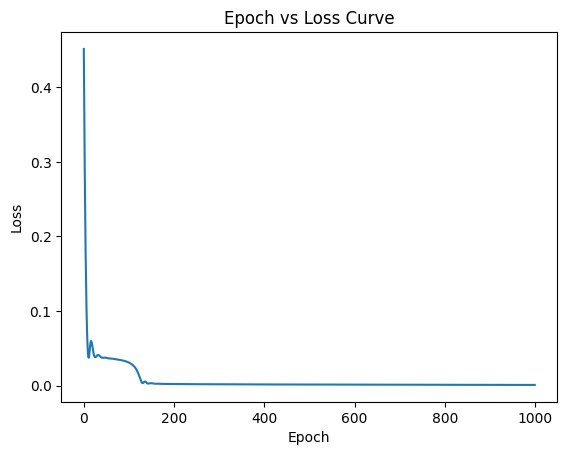

In [20]:
import matplotlib.pyplot as plt

losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = lstm(X_train.to(device))

    # obtain the loss function
    loss = criterion(outputs, Y_train.to(device))
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

# Plot epoch vs loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss Curve')
plt.show()


In [21]:
inputs=scaler.transform(df)
inputs

array([[0.23782837],
       [0.24028021],
       [0.21856392],
       ...,
       [0.34045534],
       [0.33134851],
       [0.36287215]])

In [22]:
X_test=[]
Y_test=[]

for i in range(seq_length,inputs.shape[0]):
    X_test.append(inputs[i-seq_length:i])
    #STOCK PRICE AT THE 60TH DAY
    Y_test.append(inputs[i,0])

# converting into numpy arrays
X_test,Y_test=np.array(X_test),np.array(Y_test)
Y_test=Y_test.reshape(-1,1)
print(X_test.shape,Y_test.shape)

X_test = Variable(torch.Tensor(X_test))
Y_test = Variable(torch.Tensor(Y_test))
print(X_test.shape,Y_test.shape)

(35040, 24, 1) (35040, 1)
torch.Size([35040, 24, 1]) torch.Size([35040, 1])


In [23]:
scaler.scale_

array([0.03502627])

In [24]:
Y_pred = lstm(X_test.to(device))
Y_pred=Y_pred.cpu()
Y_pred = Y_pred.detach().numpy()
Y_test = Y_test.detach().cpu().numpy()

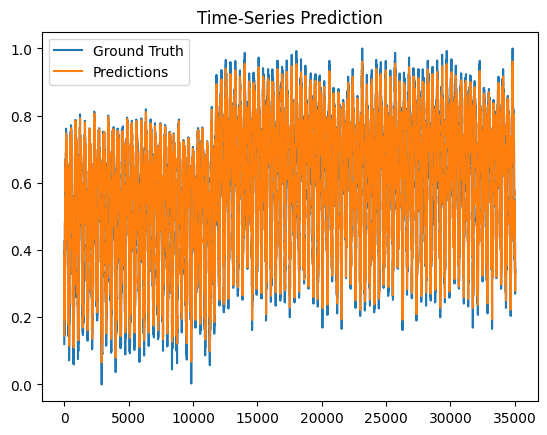

In [25]:
import matplotlib.pyplot as plt

plt.plot(Y_test, label='Ground Truth')
plt.plot(Y_pred, label='Predictions')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test.flatten(),Y_pred.flatten())

0.021292549

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(Y_test.flatten(), Y_pred.flatten())
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE): %1.5f" % mse)
print("Root Mean Squared Error (RMSE): %1.5f" % rmse)


Mean Squared Error (MSE): 0.00078
Root Mean Squared Error (RMSE): 0.02794
